R => Python  
Source: https://web.stanford.edu/class/stats191/notebooks/Simple_diagnostics.html

NOTE: 
* Not exactly porting R to Python.
* Also not [rpy2](https://rpy2.readthedocs.io/en/version_2.8.x/)

# Diagnostics for simple linear regression

* Goodness of fit of regression: analysis of variance.

* $F$-statistics.

* Residuals.

* Diagnostic plots.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats

## Geometry of least squares

Here are three pictures that help to describe different models we might fit.

### The full model

<img src="http://stats191.stanford.edu/figs/axes_simple_full.svg" width="800">



### The full model

* This picture is meant to depict the regression model
$$
Y = \beta_0 \cdot 1 + \beta_1 \cdot X + \epsilon.
$$

* The $\beta_0$ coefficient represents movement along the horizontal axis above, labelled $\pmb{1}$.

* The $\beta_1$ coefficient represents movement along the axis $X$ above.

* The vector $\hat{Y}$ is the vector of fitted values in the above model.

### The reduced model

<img src="http://stats191.stanford.edu/figs/axes_simple_reduced.svg" width="800">

### The reduced model

* This picture is meant to depict the regression model
$$
Y = \beta_0 \cdot 1 + \epsilon.
$$

* The $\beta_0$ coefficient represents movement along the horizontal axis above, labelled $\pmb{1}$.

* Since $\beta_1=0$, we have assumed there is no movement along the $X$ axis.

* The vector $\bar{Y} \cdot 1$ is the vector of fitted values in the above model.

### Both models together

<img src="http://stats191.stanford.edu/figs/axes_simple.svg" width="600"> 

* The above picture tries to capture both models in one image.

* There is a new vector: $\hat{Y} - \bar{Y} \cdot \pmb{1}$. This vector is the difference in fits between the two
previous models.


## Goodness of fit

* The closer $\hat{Y}$ is to the ${1}$ axis, the less "variation" there is along the $X$ axis. 

* This closeness can be measured by the length of the vector $\hat{Y}-\bar{Y} \cdot 1$.

* The square of a vector's length is the sum of its elements squared. These quantities
are usually referred to as *sums of squares*.

### Sums of squares

$$
\begin{aligned}
   SSE &= \sum_{i=1}^n(Y_i - \widehat{Y}_i)^2 = \sum_{i=1}^n (Y_i - \widehat{\beta}_0 - \widehat{\beta}_1 X_i)^2 \\
   SSR &= \sum_{i=1}^n(\overline{Y} - \widehat{Y}_i)^2 = \sum_{i=1}^n (\overline{Y} - \widehat{\beta}_0 - \widehat{\beta}_1 X_i)^2 \\
   SST &= \sum_{i=1}^n(Y_i - \overline{Y})^2 = SSE + SSR \\
   R^2 &= \frac{SSR}{SST} = 1 - \frac{SSE}{SST} = \widehat{Cor}(\pmb{X},\pmb{Y})^2.
   \end{aligned}
$$



* The quantity $SSE$, or *error sum of squares*, is the squared length of the vector $Y -  \hat{Y}$ which protrudes perpendicular to the plane.

* The quantity $SSR$, or *regression sum of squares*, is the length of the vector $\hat{Y} - \bar{Y} \cdot 1$.

* The quantity $SST$, or *total sum of squares*, is the length of the vector $Y - \bar{Y} \cdot 1$.

* The quantity $R^2$ is a measure of the goodness of fit of the simple linear regression model. Values near 1 indicate
much of the total variability in $Y$ is explained by the regression model.

### Mean squares

* Each sum of squares gets an extra bit of information associated to them, called their *degrees of freedom*.

* Roughly speaking, the *degrees of freedom* can be determined by dimension counting.


$$
\begin{aligned}
   MSE &= \frac{1}{n-2}\sum_{i=1}^n(Y_i - \widehat{Y}_i)^2 \\
   MSR &= \sum_{i=1}^n(\overline{Y} - \widehat{Y}_i)^2 \\
   MST &= \frac{1}{n-1}\sum_{i=1}^n(Y_i - \overline{Y})^2 \\
   \end{aligned}
$$

### Mean squares

* The $SSE$ has $n-2$ degrees of freedom  because it is the squared length of a vector that lies in $n-2$ dimensions. To see this, note that it is
perpendicular to the 2-dimensional plane formed by the $X$ axis and the $1$ axis.

* The $SST$ has $n-1$ degrees of freedom because it is the squared length of a vector that lies in $n-1$ dimensions. In this case, this vector is perpendicular to the $1$ axis.

* The $SSR$ has 1 degree of freedom because it is the squared length of a vector that lies in the 2-dimensional plane but is perpendicular to the $1$ axis.



### A different visualization

These sums of squares can be visualized by other means as well. 
We will illustrate with a synthetic dataset.

In [2]:
X = np.arange(0, 21) # 0 ~ 20
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [3]:
Y = 0.5 * X + 1 + np.random.normal(size=21)
Y

array([ 0.9824579 ,  2.50790419,  4.03584909,  0.53176357,  3.18005736,
        3.85591003,  3.29001339,  4.66663244,  4.10422337,  5.8754233 ,
        3.9101014 ,  5.95544515,  6.39828691,  8.09269615,  8.29276367,
        7.80159724,  9.38008831, 10.03244281,  9.69660513, 10.39081384,
       10.5459067 ])

In [4]:
X = sm.add_constant(X)
X[:5,:]

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.]])

In [5]:
res = sm.OLS(Y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     201.5
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           1.44e-11
Time:                        16:33:49   Log-Likelihood:                -27.445
No. Observations:                  21   AIC:                             58.89
Df Residuals:                      19   BIC:                             60.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0737      0.396      2.712      0.014       0.245       1.902
x1             0.4809      0.034     14.196      0.000       0.410       0.552
==============================================================================
Omnibus:                        2.521   Durbin-Watson:                   2.409
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.004
Skew:                          -0.418   Prob(JB):                        0.605
Kurtosis:                       3.671   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
y_mean = np.mean(Y)
y_mean

5.882237235458582

In [7]:
y_hat = res.predict()
y_hat

array([ 1.07369904,  1.55455286,  2.03540668,  2.5162605 ,  2.99711432,
        3.47796814,  3.95882196,  4.43967578,  4.9205296 ,  5.40138342,
        5.88223724,  6.36309105,  6.84394487,  7.32479869,  7.80565251,
        8.28650633,  8.76736015,  9.24821397,  9.72906779, 10.20992161,
       10.69077543])

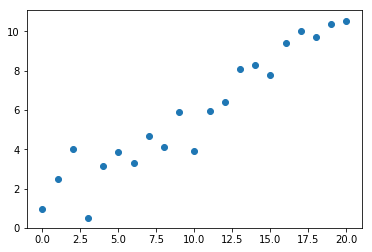

In [8]:
plt.scatter(X[:,1], Y) # not the constant
plt.show()

In [9]:
y_means = np.repeat(y_mean,len(Y))

SST: Total sum of squares

In [10]:
np.vstack((X[:,1], X[:,1]))

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]])

In [11]:
np.vstack((Y,y_means))

array([[ 0.9824579 ,  2.50790419,  4.03584909,  0.53176357,  3.18005736,
         3.85591003,  3.29001339,  4.66663244,  4.10422337,  5.8754233 ,
         3.9101014 ,  5.95544515,  6.39828691,  8.09269615,  8.29276367,
         7.80159724,  9.38008831, 10.03244281,  9.69660513, 10.39081384,
        10.5459067 ],
       [ 5.88223724,  5.88223724,  5.88223724,  5.88223724,  5.88223724,
         5.88223724,  5.88223724,  5.88223724,  5.88223724,  5.88223724,
         5.88223724,  5.88223724,  5.88223724,  5.88223724,  5.88223724,
         5.88223724,  5.88223724,  5.88223724,  5.88223724,  5.88223724,
         5.88223724]])

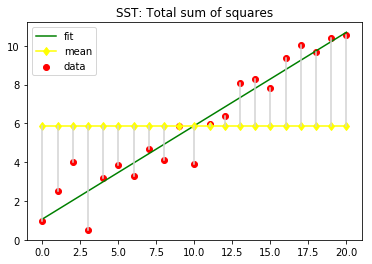

In [12]:
plt.scatter(X[:,1], Y, color='red', label='data')
plt.plot(X[:,1], y_hat, color='green',label='fit')
plt.plot(X[:,1], y_means, color='yellow',marker='d',label='mean')

plt.plot(np.vstack((X[:,1], X[:,1])), 
         np.vstack((Y,y_means)),
         color='lightgray',
         linestyle='-' )

plt.title('SST: Total sum of squares')
plt.legend()
plt.show()

SSE: Error sum of squares

In [13]:
np.vstack((Y,y_hat))

array([[ 0.9824579 ,  2.50790419,  4.03584909,  0.53176357,  3.18005736,
         3.85591003,  3.29001339,  4.66663244,  4.10422337,  5.8754233 ,
         3.9101014 ,  5.95544515,  6.39828691,  8.09269615,  8.29276367,
         7.80159724,  9.38008831, 10.03244281,  9.69660513, 10.39081384,
        10.5459067 ],
       [ 1.07369904,  1.55455286,  2.03540668,  2.5162605 ,  2.99711432,
         3.47796814,  3.95882196,  4.43967578,  4.9205296 ,  5.40138342,
         5.88223724,  6.36309105,  6.84394487,  7.32479869,  7.80565251,
         8.28650633,  8.76736015,  9.24821397,  9.72906779, 10.20992161,
        10.69077543]])

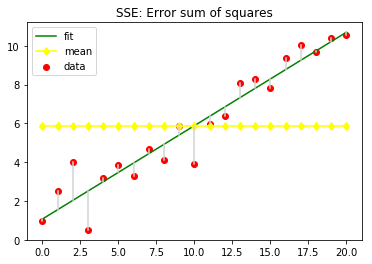

In [14]:
plt.scatter(X[:,1], Y, color='red', label='data')
plt.plot(X[:,1], y_hat, color='green',label='fit')
plt.plot(X[:,1], y_means, color='yellow',marker='d',label='mean')

plt.plot(np.vstack((X[:,1], X[:,1])), 
         np.vstack((Y,y_hat)),
         color='lightgray',
         linestyle='-' )

plt.title('SSE: Error sum of squares')
plt.legend()
plt.show()

SSR: Regression sum of squares

In [15]:
np.vstack((y_means, y_hat))

array([[ 5.88223724,  5.88223724,  5.88223724,  5.88223724,  5.88223724,
         5.88223724,  5.88223724,  5.88223724,  5.88223724,  5.88223724,
         5.88223724,  5.88223724,  5.88223724,  5.88223724,  5.88223724,
         5.88223724,  5.88223724,  5.88223724,  5.88223724,  5.88223724,
         5.88223724],
       [ 1.07369904,  1.55455286,  2.03540668,  2.5162605 ,  2.99711432,
         3.47796814,  3.95882196,  4.43967578,  4.9205296 ,  5.40138342,
         5.88223724,  6.36309105,  6.84394487,  7.32479869,  7.80565251,
         8.28650633,  8.76736015,  9.24821397,  9.72906779, 10.20992161,
        10.69077543]])

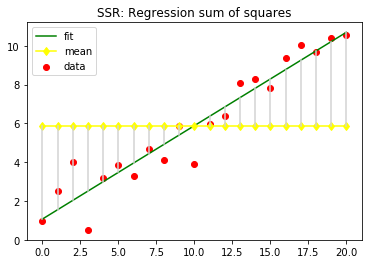

In [16]:
plt.scatter(X[:,1], Y, color='red', label='data')
plt.plot(X[:,1], y_hat, color='green',label='fit')
plt.plot(X[:,1], y_means, color='yellow',marker='d',label='mean')

plt.plot(np.vstack((X[:,1], X[:,1])), 
         np.vstack((y_means, y_hat)),
         color='lightgray',
         linestyle='-' )

plt.title('SSR: Regression sum of squares')
plt.legend()
plt.show()

## Definition of $R^2$

As noted above, if the regression model fits very well, then $SSR$ will be
large relative to $SST$. The $R^2$ score is just the
ratio of these sums of squares.  

We'll verify this on the `wages` data.

In [18]:
url = "http://stats191.stanford.edu/data/wage.csv"
data = pd.read_csv(url)
data.head()

,education,logwage
0,16.750000,2.845000
1,15.000000,2.446667
2,10.000000,1.560000
3,12.666667,2.099167
4,15.000000,2.490000


In [19]:
formula = "logwage ~ education"
wages_res = ols(formula, data=data).fit()
wages_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logwage   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     340.0
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           1.15e-70
Time:                        16:35:19   Log-Likelihood:                -1114.3
No. Observations:                2178   AIC:                             2233.
Df Residuals:                    2176   BIC:                             2244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2392      0.055     22.541      0.000       1.131       1.347
education      0.0786      0.004     18.440      0.000       0.070       0.087
==============================================================================
Omnibus:                       46.662   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.725
Skew:                          -0.269   Prob(JB):                     1.07e-13
Kurtosis:                       3.606   Cond. No.                         82.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's verify our claim $SST=SSE+SSR$:

In [20]:
wages_y = data["logwage"]
wages_y_mean = np.mean(data["logwage"])
wages_y_hat  = wages_res.predict()

SST = np.sum(((wages_y - wages_y_mean)**2))
SSE = np.sum((wages_res.resid**2))
SSR = np.sum(((wages_y_mean - wages_y_hat)**2))
print("SST      :", SST)
print("SSE + SSR:", (SSE + SSR))

SST      : 410.2148277475004
SSE + SSR: 410.2148277475005


The $R^2$ is also closely related to the $F$ statistic
reported as the goodness of fit in *summary* of *lm*.

In [21]:
F = (SSR/1) / (SSE/wages_res.df_resid)
F

340.0296918700755

In [22]:
wages_res.df_resid

2176.0

In [23]:
wages_res.rsquared

0.13514534147541912

In other words, for simple linear regression that `F-statistic` is
$$
F = \frac{(n-2) \cdot R^2}{1-R^2}
$$
where $n-2$ is `wages_res.df_resid`.

In [24]:
(wages_res.df_resid * wages_res.rsquared) / (1 - wages_res.rsquared)

340.0296918700748

Finally,  $R=\sqrt{R^2}$ is called the (absolute) *correlation coefficient* because it is equal to the absolute value of sample correlation coefficient of $X$ and $Y$.

In [25]:
data.corr()

,education,logwage
education,1.000000,0.367621
logwage,0.367621,1.000000


In [26]:
(data.corr()["logwage"]["education"])**2

0.13514534147541943

In [27]:
(data.corr()["education"]["logwage"])**2 #symmetric

0.13514534147541943

## $F$-statistics

After a $t$-statistic, the next most commonly encountered statistic is a $\chi^2$ statistic, or its closely related cousin,
the $F$ statistic.

* Roughly speaking, an $F$-statistic is a ratio of *sample variances*: it has a numerator, $N$, 
 and a denominator, $D$ that are independent.
 
 *  Let $$N \sim \frac{\chi^2_{\rm num} }{ df_{{\rm num}}}, \qquad D \sim \frac{\chi^2_{\rm den} }{ df_{{\rm den}}}$$
 and define
 $$
 F = \frac{N}{D}.
 $$
 
 * We say $F$ has an $F$ distribution with parameters $df_{{\rm num}}, df_{{\rm den}}$ and write $F \sim F_{df_{{\rm num}}, df_{{\rm den}}}$

### $F$ statistic for simple linear regression


* The ratio $$
   F=\frac{SSR/1}{SSE/(n-2)} = \frac{(SST-SSE)/1}{SSE/(n-2)} = \frac{MSR}{MSE}$$
   can be thought of as a *ratio of a difference in sums of squares normalized by our "best estimate" of variance* .

* In fact, under $H_0:\beta_1=0$, $$
   F \sim F_{1, n-2}
   $$
because $$
   \begin{aligned}
   SSR &= \|\hat{Y} - \bar{Y} \cdot 1\|^2 \\
   SSE &= \|Y - \hat{Y}\|^2
   \end{aligned}
   $$
   and from our picture, these vectors are orthogonal.
   
* The null hypothesis $H_0:\beta_1=0$ implies that $SSR \sim \chi^2_1 \cdot \sigma^2$.

### Relation between $F$ and $t$ statistics.

* If $T \sim t_{\nu}$, then
   $$
   T^2 \sim \frac{N(0,1)^2}{\chi^2_{\nu}/\nu} \sim \frac{\chi^2_1/1}{\chi^2_{\nu}/\nu}.$$

* In other words, the square of a $t$-statistic is an $F$-statistic.
   Because it is always positive, an $F$-statistic has no *direction* associated with it.
 
* In fact 
   $$
   F = \frac{MSR}{MSE} = \frac{\widehat{\beta}_1^2}{SE(\widehat{\beta}_1)^2}.$$
Let's check this in our example.

In [28]:
wages_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logwage   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     340.0
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           1.15e-70
Time:                        16:35:19   Log-Likelihood:                -1114.3
No. Observations:                2178   AIC:                             2233.
Df Residuals:                    2176   BIC:                             2244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2392      0.055     22.541      0.000       1.131       1.347
education      0.0786      0.004     18.440      0.000       0.070       0.087
==============================================================================
Omnibus:                       46.662   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.725
Skew:                          -0.269   Prob(JB):                     1.07e-13
Kurtosis:                       3.606   Cond. No.                         82.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The $t$ statistic for *education* is the $t$-statistic for the parameter $\beta_1$ under $H_0:\beta_1=0$. Its value
is 18.4 above. If we square it, we should get about the same as the *F-statistic*.


In [29]:
18.44**2

340.03360000000004

### Interpretation of an $F$-statistic

* In regression, the numerator is usually a difference in *goodness of fit* of two  (nested) models.

* The denominator is $\hat{\sigma}^2$ -- an estimate of $\sigma^2$.

* In our example today: the bigger model is the simple linear regression model, the smaller is the model
 with constant mean (one sample model).

* If the $F$ is large, it says that the *bigger*  model explains a lot more variability in $Y$  (relative to $\sigma^2$) than the smaller one.


### Analysis of variance

- The equation
$$
SST = SSE + SSR
$$
is a *decomposition* of the total variability into separate pieces.

- This decomposition is often referred to as an **analysis of variance (ANOVA)**.

### Interpretation of an $F$-statistic

<img src="http://stats191.stanford.edu/figs/axes_simple.svg" width="600"> 

* If the null hypothesis is true, $\hat{Y}$ will be close to $\bar{Y} \cdot 1$. 

* How close? We must compare to the size of the noise, i.e. $\sigma^2$.

* Not knowing $\sigma^2$, we substitute our estimate $\hat{\sigma}^2$.


### The $F$-statistic for simple linear regression revisited

The $F$ statistic should compare two models. What are these models?

* The *full model* would be
$$
(FM) \qquad  Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i 
$$

* The *reduced model* would be
$$
(RM) \qquad  Y_i = \beta_0 + \varepsilon_i 
$$

* The $F$-statistic then has the form
$$
F=\frac{(SSE(RM) - SSE(FM)) / (df_{RM} - df_{FM})}{SSE(FM) / df_{FM}}
$$


### The $F$-statistic for simple linear regression revisited

* The *null hypothesis* is 
$$
H_0: \text{reduced model (RM) is correct}.
$$

* The usual $\alpha$ rejection rule would be to reject $H_0$ if the $F_{\text{obs}}$ the  observed $F$ statistic is greater than
$F_{1,n-2,1-\alpha}$. 

* In our case, the observed $F$ was 340, $n-2=2176$ and the appropriate 5% threshold is computed below to be 3.85. Therefore, we strongly
reject $H_0$.

In [30]:
stats.f.ppf(0.95, 1, 2176)

3.8457358464718414

## Diagnostics for simple linear regression

While we have used a particular model for our data, it may not be correct. It is important that we have
some tools that help us determine whether or model is reasonable or not.


### What can go wrong?

* Using a linear regression function can be wrong: maybe regression function should be quadratic.

* We assumed independent Gaussian errors with the same variance. This may be incorrect.
    - The errors may not be normally distributed.
    - The errors may not be independent.
    - The errors may not have the same variance.
    
* Detecting problems is more *art* then *science*, i.e.
   we cannot *test* for all possible problems in a regression model.
   
The basic idea of most diagnostic measures is the following. *If the model is correct then
   residuals $e_i = Y_i -\widehat{Y}_i, 1 \leq i \leq n$ should look like a sample of
   (not quite independent) $N(0, \sigma^2)$ random variables.*

### A poorly fitting model

Here is an example of a poorly fitting model. It will turn out that there is a simple fix for this dataset: a model that
includes a quadratic term for $X$ will turn out to have a much better fit. Finding this
fix in practice can be difficult.

In [31]:
url = 'http://web.stanford.edu/class/stats191/data/anscombe.table'
data = pd.read_table(url, sep='\t')
data.head()

/home/doojung/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  from ipykernel import kernelapp as app


,Y1,X1,Y2,X2,Y3,X3,Y4,X4
0,8.04,10,9.14,10,7.46,10,6.58,8
1,6.95,8,8.14,8,6.77,8,5.76,8
2,7.58,13,8.74,13,12.74,13,7.71,8
3,8.81,9,8.77,9,7.11,9,8.84,8
4,8.33,11,9.26,11,7.81,11,8.47,8


In [32]:
data=data.sort_values('X2')
data=data.reset_index(drop=True)
e = np.random.normal(size=len(data.Y2))
y = data.Y2 + e
x = data.X2

In [33]:
y

0      3.448432
1      3.988153
2      6.235860
3      8.833585
4      7.127407
5     11.805971
6      9.520312
7      9.629122
8     11.023605
9      8.757510
10     6.929376
Name: Y2, dtype: float64

In [34]:
x

0      4
1      5
2      6
3      7
4      8
5      9
6     10
7     11
8     12
9     13
10    14
Name: X2, dtype: int64

In [35]:
x = sm.add_constant(x) 

/home/doojung/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [36]:
ols_model = sm.OLS(y, x)
res_ols = ols_model.fit()
print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     5.550
Date:                Thu, 13 Jun 2019   Prob (F-statistic):             0.0429
Time:                        16:35:19   Log-Likelihood:                -23.273
No. Observations:                  11   AIC:                             50.55
Df Residuals:                       9   BIC:                             51.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4503      2.018      1.709      0.1

/home/doojung/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


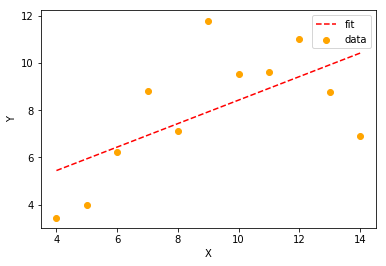

In [37]:
plt.scatter(x.X2, y, marker='o',label='data', color='orange')
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('Y')
y_pred = res_ols.predict()

plt.plot(x.X2, y_pred, '--', color = 'red',label='fit')
plt.legend()
plt.show()

Let's take a look at the residuals from this model. Patterns in these residual plots may suggest something like a quadratic effect is missing, but they can also suggest some sort of serial dependence in the random errors. We will discuss this later, when we discuss correlated-errors.


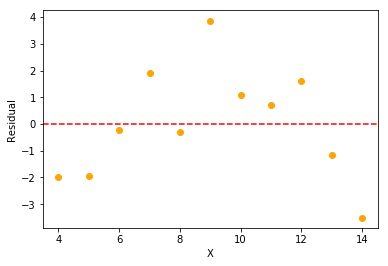

In [38]:
plt.scatter(x.X2, res_ols.resid, marker='o',label='data', color='orange')
plt.axhline(0, color='red', linestyle='--')

plt.gca().set_ylabel('Residual')
plt.gca().set_xlabel('X')

plt.show()

We will add a quadratic term to our model. This is our first example of a *multiple linear regression model*.


In [39]:
x["X2^2"] = data.X2**2
x

,const,X2,X2^2
0,1.0,4,16
1,1.0,5,25
2,1.0,6,36
3,1.0,7,49
4,1.0,8,64
5,1.0,9,81
6,1.0,10,100
7,1.0,11,121
8,1.0,12,144
9,1.0,13,169


In [40]:
quad_ols_model = sm.OLS(y, x)
res_quad_ols = quad_ols_model.fit()
print(res_quad_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     17.95
Date:                Thu, 13 Jun 2019   Prob (F-statistic):            0.00110
Time:                        16:35:20   Log-Likelihood:                -16.550
No. Observations:                  11   AIC:                             39.10
Df Residuals:                       8   BIC:                             40.29
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.1029      3.307     -3.055      0.0

/home/doojung/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


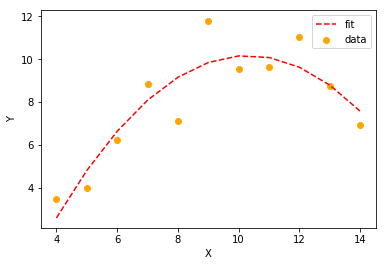

In [41]:
plt.scatter(x.X2, y, marker='o',label='data', color='orange')
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('Y')
quad_y_pred = res_quad_ols.predict()

plt.plot(x.X2, quad_y_pred, '--', color = 'red',label='fit')
plt.legend()
plt.show()

The residuals of the quadratic model have no apparent pattern in them, suggesting this is a better fit than the simple linear regression model.


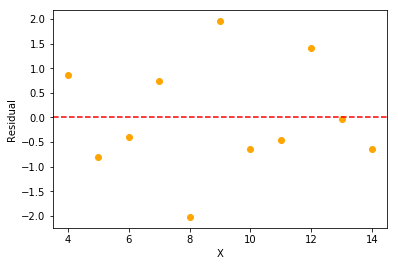

In [42]:
plt.scatter(x.X2, res_quad_ols.resid, marker='o',label='data', color='orange')
plt.axhline(0,color='red', linestyle='--')

plt.gca().set_ylabel('Residual')
plt.gca().set_xlabel('X')

plt.show()

### Assessing normality of errors

Another common diagnostic plot is the *qqplot* where *qq* stands for *Quantile-Quantile*. Roughly speaking, a qqplot is designed to see if the quantiles of two distributions match. 

* The function *qqnorm* can be used to ascertain if a sample of numbers are roughly normally distributed. If the points lie on the diagonal line, this is evidence that the sample is normally distributed. Various departures from the diagonal indicate skewness, asymmetry, etc.

* If $e_i, 1\leq i \leq n$ were really a sample of
$N(0, \sigma^2)$ then their sample quantiles should be close to the
sample quantiles of the $N(0, \sigma^2)$ distribution.

The $qqnorm$ plot is a plot of
   $$
   e_{(i)}  \ {\rm vs.} \  \mathbb{E}(\varepsilon_{(i)}), \qquad 1 \leq i \leq n.$$
   where $e_{(i)}$ is the $i$-th smallest residual (order statistic) and
   $\mathbb{E}(\varepsilon_{(i)})$ is the expected value for independent $\varepsilon_i$'s $\sim N(0,\sigma^2)$.


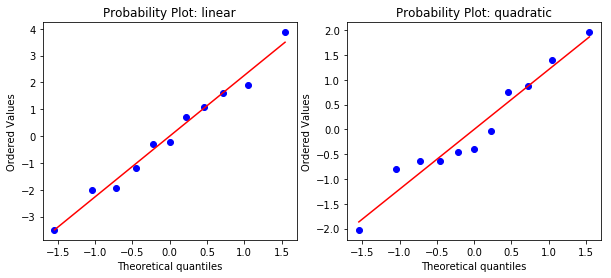

In [43]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)

stats.probplot(res_ols.resid,      plot=axs[0])
stats.probplot(res_quad_ols.resid, plot=axs[1])

axs[0].set_title(axs[0].get_title() + ': linear' )
axs[1].set_title(axs[1].get_title() + ': quadratic' )

plt.show()

In these two examples, the qqplot does not seem vastly different, even though we know the simple model is incorrect in this case. This indicates that several diagnostic tools can be useful in assessing a model.

### Assessing constant variance assumption

One plot that is sometimes used to determine whether the variance is constant or not is a plot of 
$X$ against $e=Y-\hat{Y}$. If there is a pattern to the spread in this plot, it may indicate that the variance
changes as a function of $X$. In our earlier plots, we noticed a trend in this plot, not necessarily
evidence of changing variance.

The dataset below, taken from some work done with Dr. Robert Shafer here at Stanford http://hivdb.stanford.edu, plots HIV virus load against a score related to the the genetic makeup of a patientâ€™s virus shows clear non-constant variance. It also provides a clear example of an outlier, or a point that is a clear departure from the model.


In [44]:
url = 'http://stats191.stanford.edu/data/HIV.VL.table'
data = pd.read_table(url, sep=' ')
data.head()

/home/doojung/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  from ipykernel import kernelapp as app


,GSS,VL
0,4.0,40406
1,13.4,2603
2,7.4,55246
3,2.7,22257
4,13.5,400


In [45]:
formula = "VL ~ GSS"
hiv_res = ols(formula, data=data).fit()
hiv_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     VL   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7357
Date:                Thu, 13 Jun 2019   Prob (F-statistic):              0.396
Time:                        16:35:22   Log-Likelihood:                -574.33
No. Observations:                  47   AIC:                             1153.
Df Residuals:                      45   BIC:                             1156.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.352e+04   1.72e+04      0.786      0.436   -2.11e+04    4.82e+04
GSS         1691.0926   1971.565      0.858      0.396   -2279.843    5662.028
==============================================================================
Omnibus:                       75.489   Durbin-Watson:                   2.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.473
Skew:                           4.174   Prob(JB):                    7.42e-209
Kurtosis:                      23.488   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

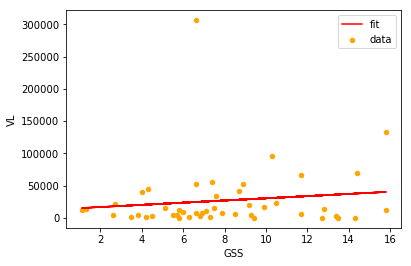

In [46]:
ax=data.plot.scatter(x='GSS',y='VL',label='data', color='orange')
ax.plot(data.GSS, hiv_res.predict(),color='red',label='fit')

ax.legend()
plt.show()

In [47]:
subset_idx = data.VL < 200000
formula = "VL ~ GSS"

hiv_res_sub = ols(formula, data=data[subset_idx]).fit()
hiv_res_sub.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     VL   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     4.588
Date:                Thu, 13 Jun 2019   Prob (F-statistic):             0.0378
Time:                        16:35:22   Log-Likelihood:                -533.49
No. Observations:                  46   AIC:                             1071.
Df Residuals:                      44   BIC:                             1075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2801.5167   9296.119      0.301      0.765   -1.59e+04    2.15e+04
GSS         2270.9411   1060.225      2.142      0.038     134.198    4407.684
==============================================================================
Omnibus:                       20.332   Durbin-Watson:                   2.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.927
Skew:                           1.473   Prob(JB):                     8.63e-07
Kurtosis:                       5.428   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

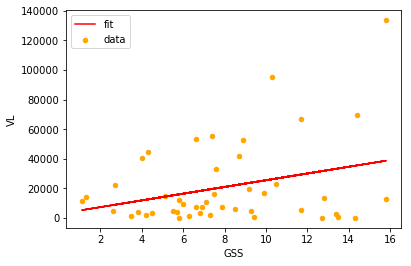

In [48]:
ax=data[subset_idx].plot.scatter(x='GSS',y='VL',label='data', color='orange')
ax.plot(data[subset_idx].GSS, hiv_res_sub.predict(),color='red',label='fit')

ax.legend()
plt.show()

When we plot the residuals against the fitted values for this model (even with the outlier removed) we see that the variance
clearly depends on $GSS$. They also do not seem symmetric around 0 so perhaps the Gaussian model is not appropriate.


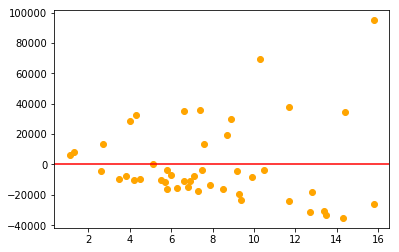

In [49]:
plt.scatter(data.GSS[subset_idx], hiv_res_sub.resid, color='orange')
plt.axhline(0,color='red')

ax.legend()
plt.show()

### Outliers

Outliers can be obvious to spot (or not) but very difficult to define rigorously.
Roughly speaking, they points where the model really does not fit.

They might correspond to mistakes in data transcription, lab 
errors, who knows? If possible, they should be identified and (hopefully) explained.

Later, we'll talk about some formal ways to detect outliers.